# Referência base


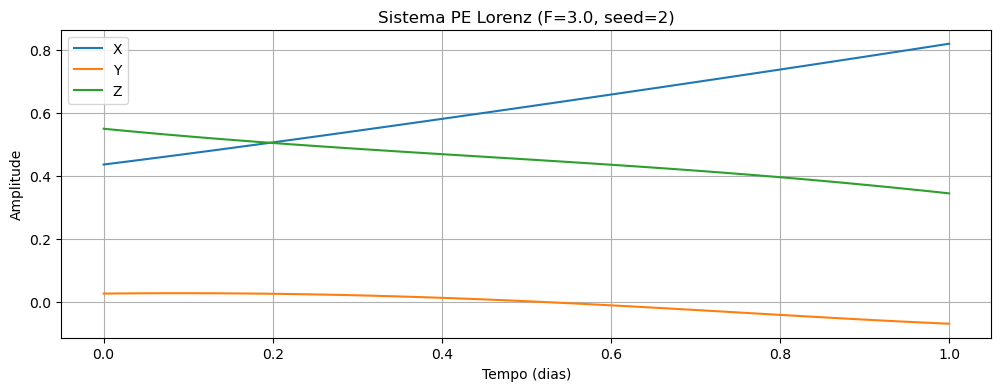

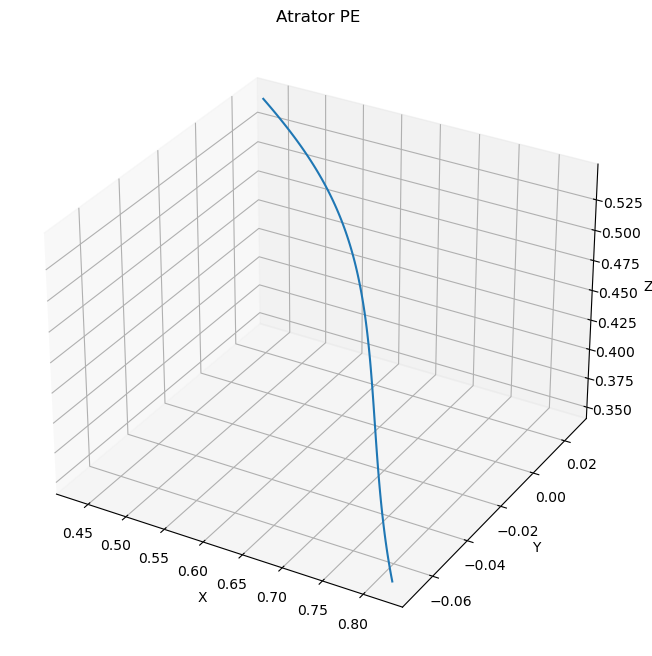

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def lorenz_pe(state, t, F=3.0):
   X, Y, Z = state
   a = 0.25
   b = 4.0
   
   dX = -Y**2 - Z**2 - a*X + a*F 
   dY = X*Y - b*X*Z - Y + 1
   dZ = b*X*Y + X*Z - Z
   
   return np.array([dX, dY, dZ])

def rk4_step(f, state, t, dt, *args):
   k1 = f(state, t, *args)
   k2 = f(state + dt*k1/2, t + dt/2, *args)
   k3 = f(state + dt*k2/2, t + dt/2, *args)
   k4 = f(state + dt*k3, t + dt, *args)
   return state + dt * (k1 + 2*k2 + 2*k3 + k4) / 6

def simulate(x0, t_span, dt, F=3.0):
   steps = int((t_span[1] - t_span[0]) / dt)
   t = np.linspace(t_span[0], t_span[1], steps)
   x = np.zeros((steps, 3))
   x[0] = x0
   
   for i in range(1, steps):
       x[i] = rk4_step(lorenz_pe, x[i-1], t[i-1], dt, F)
   
   return t, x

if __name__ == "__main__":
   # Input do usuário
   n_days = int(input("Digite o número de dias para simulação: "))
   seed = int(input("Digite a seed para números aleatórios (inteiro): "))
   
   # Configura seed e condições iniciais
   np.random.seed(seed)
   x0 = np.random.rand(3)  # Vaalores aleatórios entre 0 e 1
   
   # Parâmetros da simulação
   dt = 0.01
   t_span = [0, n_days]
   F = 3.0
   
   # Simulação
   t, x = simulate(x0, t_span, dt, F)

   # Plots
   plt.figure(figsize=(12, 4))
   plt.plot(t, x[:,0], label='X')
   plt.plot(t, x[:,1], label='Y')
   plt.plot(t, x[:,2], label='Z')
   plt.xlabel('Tempo (dias)')
   plt.ylabel('Amplitude')
   plt.legend()
   plt.title(f'Sistema PE Lorenz (F={F}, seed={seed})')
   plt.grid(True)
   plt.show()

   fig = plt.figure(figsize=(8, 8))
   ax = fig.add_subplot(111, projection='3d')
   ax.plot(x[:,0], x[:,1], x[:,2])
   ax.set_xlabel('X')
   ax.set_ylabel('Y')
   ax.set_zlabel('Z')
   ax.set_title('Atrator PE')
   plt.show()

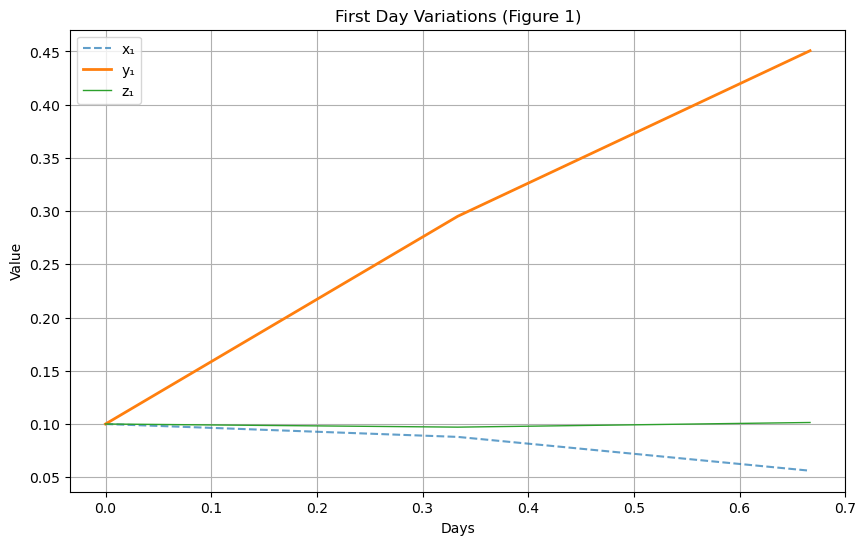

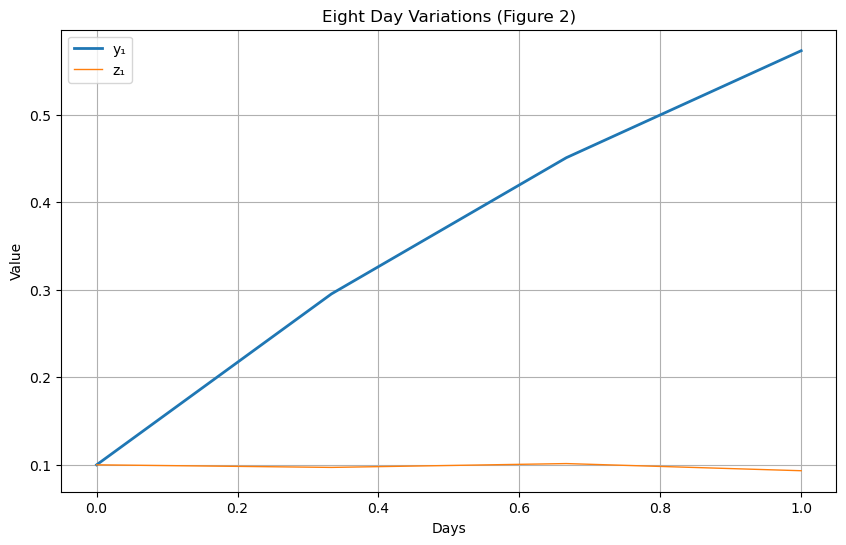

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def lorenz_pe(state, t, F1=0.10):
    """
    Implementation of PE model from Section 4 of Lorenz 1980
    F1 = 0.10 as specified in the paper
    """
    x1, y1, z1 = state
    
    # Parameters from the paper
    a1 = 1.0  # As specified for a₁
    a2 = 1.0  # Choice for a₂
    a3 = 1.0  # Choice for a₃
    
    # Equations (33)-(35) from the paper
    dx1dt = -y1**2 - z1**2 - a1*x1 + a1*F1
    dy1dt = x1*y1 - 4*x1*z1 - y1 + 1
    dz1dt = 4*x1*y1 + x1*z1 - z1
    
    return np.array([dx1dt, dy1dt, dz1dt])

def rk4_step(f, state, t, dt, *args):
    """Fourth-order Runge-Kutta integration step"""
    k1 = f(state, t, *args)
    k2 = f(state + dt*k1/2, t + dt/2, *args)
    k3 = f(state + dt*k2/2, t + dt/2, *args)
    k4 = f(state + dt*k3, t + dt, *args)
    return state + dt * (k1 + 2*k2 + 2*k3 + k4) / 6

def simulate():
    # Time parameters from the paper
    dt = 1/4  # Δτ = 1/12 (15 minutes in normalized time)
    total_days = 1  # As mentioned in paper for first numerical integration
    steps = int(total_days / dt)
    
    # Time array
    t = np.linspace(0, total_days, steps)
    
    # Initialize state array
    x = np.zeros((steps, 3))
    
    # Initial conditions (all set to 0.10 as specified)
    x[0] = np.array([0.10, 0.10, 0.10])
    
    # Integration
    for i in range(1, steps):
        x[i] = rk4_step(lorenz_pe, x[i-1], t[i-1], dt)
    
    return t, x

# Run simulation
t, x = simulate()

# Create plots similar to Figures 1 and 2 from the paper
# First day plot (Figure 1)
plt.figure(figsize=(10, 6))
day_steps = int(1/t[1])  # Number of steps in one day
plt.plot(t[:day_steps], x[:day_steps,0], '--', label='x₁', alpha=0.7)
plt.plot(t[:day_steps], x[:day_steps,1], '-', linewidth=2, label='y₁')
plt.plot(t[:day_steps], x[:day_steps,2], '-', linewidth=1, label='z₁')
plt.xlabel('Days')
plt.ylabel('Value')
plt.title('First Day Variations (Figure 1)')
plt.grid(True)
plt.legend()
plt.show()